In [1]:
import numpy as np
import matplotlib.pyplot as plt

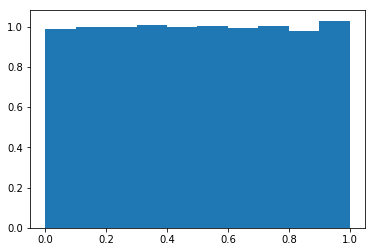

In [2]:
### COPIADO DEL EJERCICIO 1

SEMILLA = (99730+100866+96786+93762)//4

def GCL(n,Xo,incremento, modulo, multiplicador):
    """Recibe como parametro cinco enteros, numero de iteraciones n, semilla Xo,
    , incremnto, modulo y multiplicador. Imprime el valor de cada iteracion"""
    resultados = [Xo]
    for i in range(n):
        resultados.append((resultados[i]*multiplicador + incremento) % modulo)   
    resultados.pop(0)
    return resultados

def GCL_con_rango(n,Xo,incremento, modulo, multiplicador):
    """Recibe como parametro cinco enteros, numero de iteraciones n, semilla Xo,
    , incremnto, modulo y multiplicador. 
    Los numeros random generados estan entre 0 y 1.
    Imprime el valor de cada iteracion"""
    resultados = [Xo]
    for i in range(n):
        resultados.append(((resultados[i]*multiplicador + incremento) % modulo))  
    resultados.pop(0)
    for i in range(n):
        resultados[i] = resultados[i]/modulo   
    return resultados

plt.hist(GCL_con_rango(100000,SEMILLA,1664525, 2**32, 1013904223),density=True)
plt.show()

In [3]:
def f(x):
    if (x < (-np.pi / 2)) or (x > np.pi/2):
        return 0.
    else:
        return (13/(12*np.pi) - (1/(np.pi**3)) * x**2)

f = np.vectorize(f)

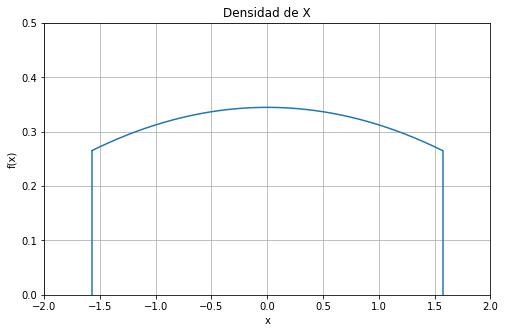

In [4]:
dt = 0.01
plt.figure(figsize=[8,5])
x = np.arange(-np.pi/2,np.pi/2,dt)
plt.plot(x,f(x))

plt.axvline(-np.pi/2,0,f(-np.pi/2)/0.5)
plt.axvline(np.pi/2,0,f(np.pi/2)/0.5)

plt.axis([-2,2,0,0.5])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Densidad de X")
plt.grid(True)

La funcion de densidad de probabilidad es:
<br>
$$
    f_X(x) = \begin{cases}
                \frac{13}{12\pi} - \frac{x^2}{\pi^3},\quad -\frac{\pi}{2} \leq x \leq \frac{\pi}{2} \\
                0, \quad \text{otro caso }\\
            \end{cases}
    \\
    F_X(x) = \int_{-\infty}^{x}f_X(t) dt = \int_{-\frac{\pi}{2}}^{x} \frac{13}{12\pi} - \frac{t^2}{\pi^3} dt\\
    \implies F_X(x) =  \frac{13 t}{12\pi} - \frac{t^3}{3\pi^3} \big|_{\frac{-\pi}{2}}^x + C \\
     \implies F_X(x) = \frac{13 x}{12\pi} - \frac{x^3}{3\pi^3} + \frac{13}{24} - \frac{1}{24} + C = \frac{13 x}{12\pi} - \frac{x^3}{3\pi^3} + \frac{1}{2} + C 
     \\ F_X(-\pi/2) = 0 \implies C = 0 \implies F_X(x) = \frac{13 x}{12\pi} - \frac{x^3}{3\pi^3} + \frac{1}{2}
$$

In [18]:
def F(x):
    if (x < -np.pi/2):
        return 0.
    if (x > np.pi/2):
        return 1.
    return (13*x / (12*np.pi)) - (x**3)/(3*np.pi**3) + 1/2

F = np.vectorize(F)

dt=0.01
rango_muestras = np.arange(-np.pi/2,np.pi,dt)
muestras = F(rango_muestras)


# Se invierten los ejes y se interpolan las muestras tomadas para calcular la inversa en un punto en [0,1]
def Finv(u):
    t = -np.pi/2
    i=1
    m = muestras[1]
    m_ant = muestras[0]
    while (m < u):
        t+=dt
        m_ant = m
        i+=1
        m = muestras[i]
        
    inv = (t-dt) + dt*(u-m_ant)/(m - m_ant)
    return inv

Finv = np.vectorize(Finv)


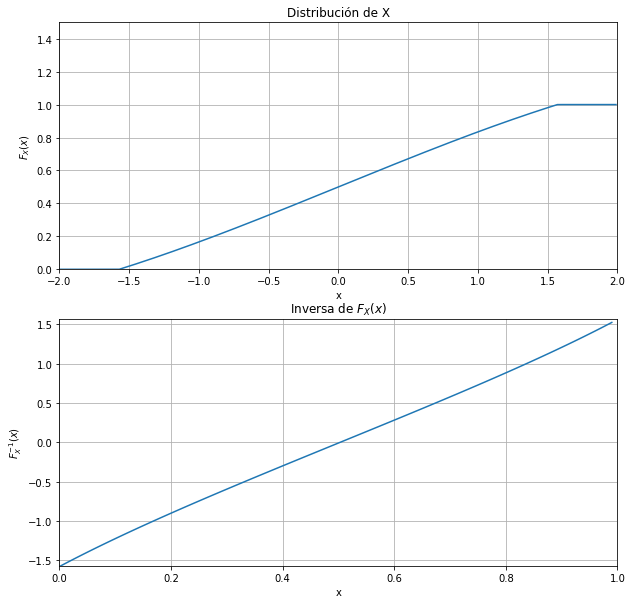

In [45]:
plt.figure(figsize=[10,10])
x = np.arange(-2,2,dt)

plt.subplot(211)
plt.plot(x,F(x))
plt.axis([-2,2,0,1.5])
plt.xlabel("x")
plt.ylabel("$F_X(x)$")
plt.title("Distribución de X")

plt.grid(True)


u = np.arange(0,1,0.01)
plt.subplot(212)
plt.plot(u,Finv(u))
plt.axis([0,1,-np.pi/2,np.pi/2])
plt.xlabel("x")
plt.ylabel("$F_X^{-1}(x)$")
plt.title("Inversa de $F_X(x)$")
plt.grid(True)

In [21]:
N = int(1e5)
U = GCL_con_rango(N,SEMILLA,1664525, 2**32, 1013904223)
Xgen = Finv(U)

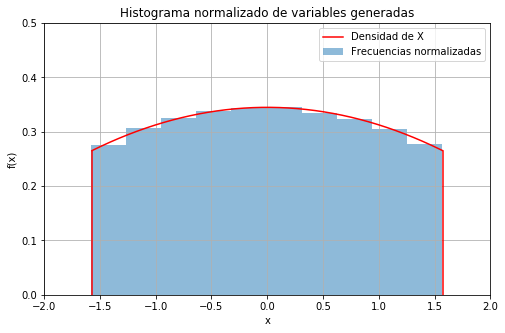

In [36]:
dt = 0.01
plt.figure(figsize=[8,5])
x = np.arange(-np.pi/2,np.pi/2,dt)
plt.plot(x,f(x),'r',label="Densidad de X")

plt.axvline(-np.pi/2,0,f(-np.pi/2)/0.5,c='r')
plt.axvline(np.pi/2,0,f(np.pi/2)/0.5,c='r')

plt.axis([-2,2,0,0.5])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Histograma normalizado de variables generadas")
plt.grid(True)
hist = plt.hist(Xgen,density=True,alpha=0.5,label="Frecuencias normalizadas")

plt.legend()


plt.show()